In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from pylab import rcParams

In [302]:
lstm = pd.read_csv('lstm.csv')
bp_time = pd.read_csv('bp_time.csv')
bp_spatial = pd.read_csv('bp_spatial.csv')
true = pd.read_csv('Trina, 10.5kW, mono-Si, Dual, 2009_23-24_data_5min.csv')

In [303]:
lstm

,timestamp,power_lstm
0,2023-11-30 03:30:00,0.002185
1,2023-11-30 03:35:00,0.000000
2,2023-11-30 03:40:00,0.000000
3,2023-11-30 03:45:00,0.000000
4,2023-11-30 03:50:00,0.000000
...,...,...
1985,2023-12-07 01:00:00,0.000000
1986,2023-12-07 01:05:00,0.000000
1987,2023-12-07 01:10:00,0.000000
1988,2023-12-07 01:15:00,0.000375


In [304]:
bp_time

,timestamp,power_bp_time
0,2023-11-30 03:30:00,-0.016334
1,2023-11-30 03:35:00,-0.003434
2,2023-11-30 03:40:00,-0.003498
3,2023-11-30 03:45:00,-0.002827
4,2023-11-30 03:50:00,-0.002208
...,...,...
1985,2023-12-07 01:00:00,0.006187
1986,2023-12-07 01:05:00,0.004336
1987,2023-12-07 01:10:00,0.006259
1988,2023-12-07 01:15:00,0.003914


In [305]:
bp_spatial

,timestamp,power_bp_spatial
0,2023-11-30 03:30:00,-0.001090
1,2023-11-30 03:35:00,-0.001090
2,2023-11-30 03:40:00,-0.001095
3,2023-11-30 03:45:00,-0.001090
4,2023-11-30 03:50:00,-0.001139
...,...,...
1985,2023-12-07 01:00:00,-0.001090
1986,2023-12-07 01:05:00,-0.001090
1987,2023-12-07 01:10:00,-0.001090
1988,2023-12-07 01:15:00,-0.001090


In [306]:
lstm['power_lstm']

0       0.002185
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1985    0.000000
1986    0.000000
1987    0.000000
1988    0.000375
1989    0.001245
Name: power_lstm, Length: 1990, dtype: float64

In [307]:
bp_time['power_bp_time']

0      -0.016334
1      -0.003434
2      -0.003498
3      -0.002827
4      -0.002208
          ...   
1985    0.006187
1986    0.004336
1987    0.006259
1988    0.003914
1989    0.004428
Name: power_bp_time, Length: 1990, dtype: float64

In [308]:
bp_time['power_bp_time']

0      -0.016334
1      -0.003434
2      -0.003498
3      -0.002827
4      -0.002208
          ...   
1985    0.006187
1986    0.004336
1987    0.006259
1988    0.003914
1989    0.004428
Name: power_bp_time, Length: 1990, dtype: float64

In [309]:
data=pd.concat([lstm,bp_time['power_bp_time'],bp_spatial['power_bp_spatial']],axis=1)

In [310]:
data

,timestamp,power_lstm,power_bp_time,power_bp_spatial
0,2023-11-30 03:30:00,0.002185,-0.016334,-0.001090
1,2023-11-30 03:35:00,0.000000,-0.003434,-0.001090
2,2023-11-30 03:40:00,0.000000,-0.003498,-0.001095
3,2023-11-30 03:45:00,0.000000,-0.002827,-0.001090
4,2023-11-30 03:50:00,0.000000,-0.002208,-0.001139
...,...,...,...,...
1985,2023-12-07 01:00:00,0.000000,0.006187,-0.001090
1986,2023-12-07 01:05:00,0.000000,0.004336,-0.001090
1987,2023-12-07 01:10:00,0.000000,0.006259,-0.001090
1988,2023-12-07 01:15:00,0.000375,0.003914,-0.001090


In [311]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         1990 non-null   object 
 1   power_lstm        1990 non-null   float64
 2   power_bp_time     1990 non-null   float64
 3   power_bp_spatial  1990 non-null   float64
dtypes: float64(3), object(1)
memory usage: 62.3+ KB


In [312]:
time_data = pd.to_datetime(data['timestamp'])

In [313]:
data['timestamp'][0]

'2023-11-30 03:30:00'

In [314]:
data['timestamp'][len(data)-1]

'2023-12-07 01:20:00'

In [315]:
true = true[true[(true['timestamp']==data['timestamp'][0])].index.to_list()[0]:true[(true['timestamp']==data['timestamp'][len(data)-1])].index.to_list()[0]+1]
true = true.interpolate(method='linear')
true= true.reset_index(drop=True)

C:\Users\Sirius\AppData\Local\Temp\ipykernel_26664\1322023481.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  true = true.interpolate(method='linear')


In [316]:
#true= true.interpolate(method='linear')

In [317]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        1990 non-null   object 
 1   power            1990 non-null   float64
 2   rainfall         1990 non-null   float64
 3   temperature      1990 non-null   float64
 4   solar_radiation  1990 non-null   float64
 5   wind_speed       0 non-null      float64
dtypes: float64(5), object(1)
memory usage: 93.4+ KB


In [318]:
data=pd.concat([data,true['power']],axis=1)

In [319]:
data = data.dropna()

In [320]:
data

,timestamp,power_lstm,power_bp_time,power_bp_spatial,power
0,2023-11-30 03:30:00,0.002185,-0.016334,-0.001090,0.0
1,2023-11-30 03:35:00,0.000000,-0.003434,-0.001090,0.0
2,2023-11-30 03:40:00,0.000000,-0.003498,-0.001095,0.0
3,2023-11-30 03:45:00,0.000000,-0.002827,-0.001090,0.0
4,2023-11-30 03:50:00,0.000000,-0.002208,-0.001139,0.0
...,...,...,...,...,...
1985,2023-12-07 01:00:00,0.000000,0.006187,-0.001090,0.0
1986,2023-12-07 01:05:00,0.000000,0.004336,-0.001090,0.0
1987,2023-12-07 01:10:00,0.000000,0.006259,-0.001090,0.0
1988,2023-12-07 01:15:00,0.000375,0.003914,-0.001090,0.0


In [321]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         1990 non-null   object 
 1   power_lstm        1990 non-null   float64
 2   power_bp_time     1990 non-null   float64
 3   power_bp_spatial  1990 non-null   float64
 4   power             1990 non-null   float64
dtypes: float64(4), object(1)
memory usage: 77.9+ KB


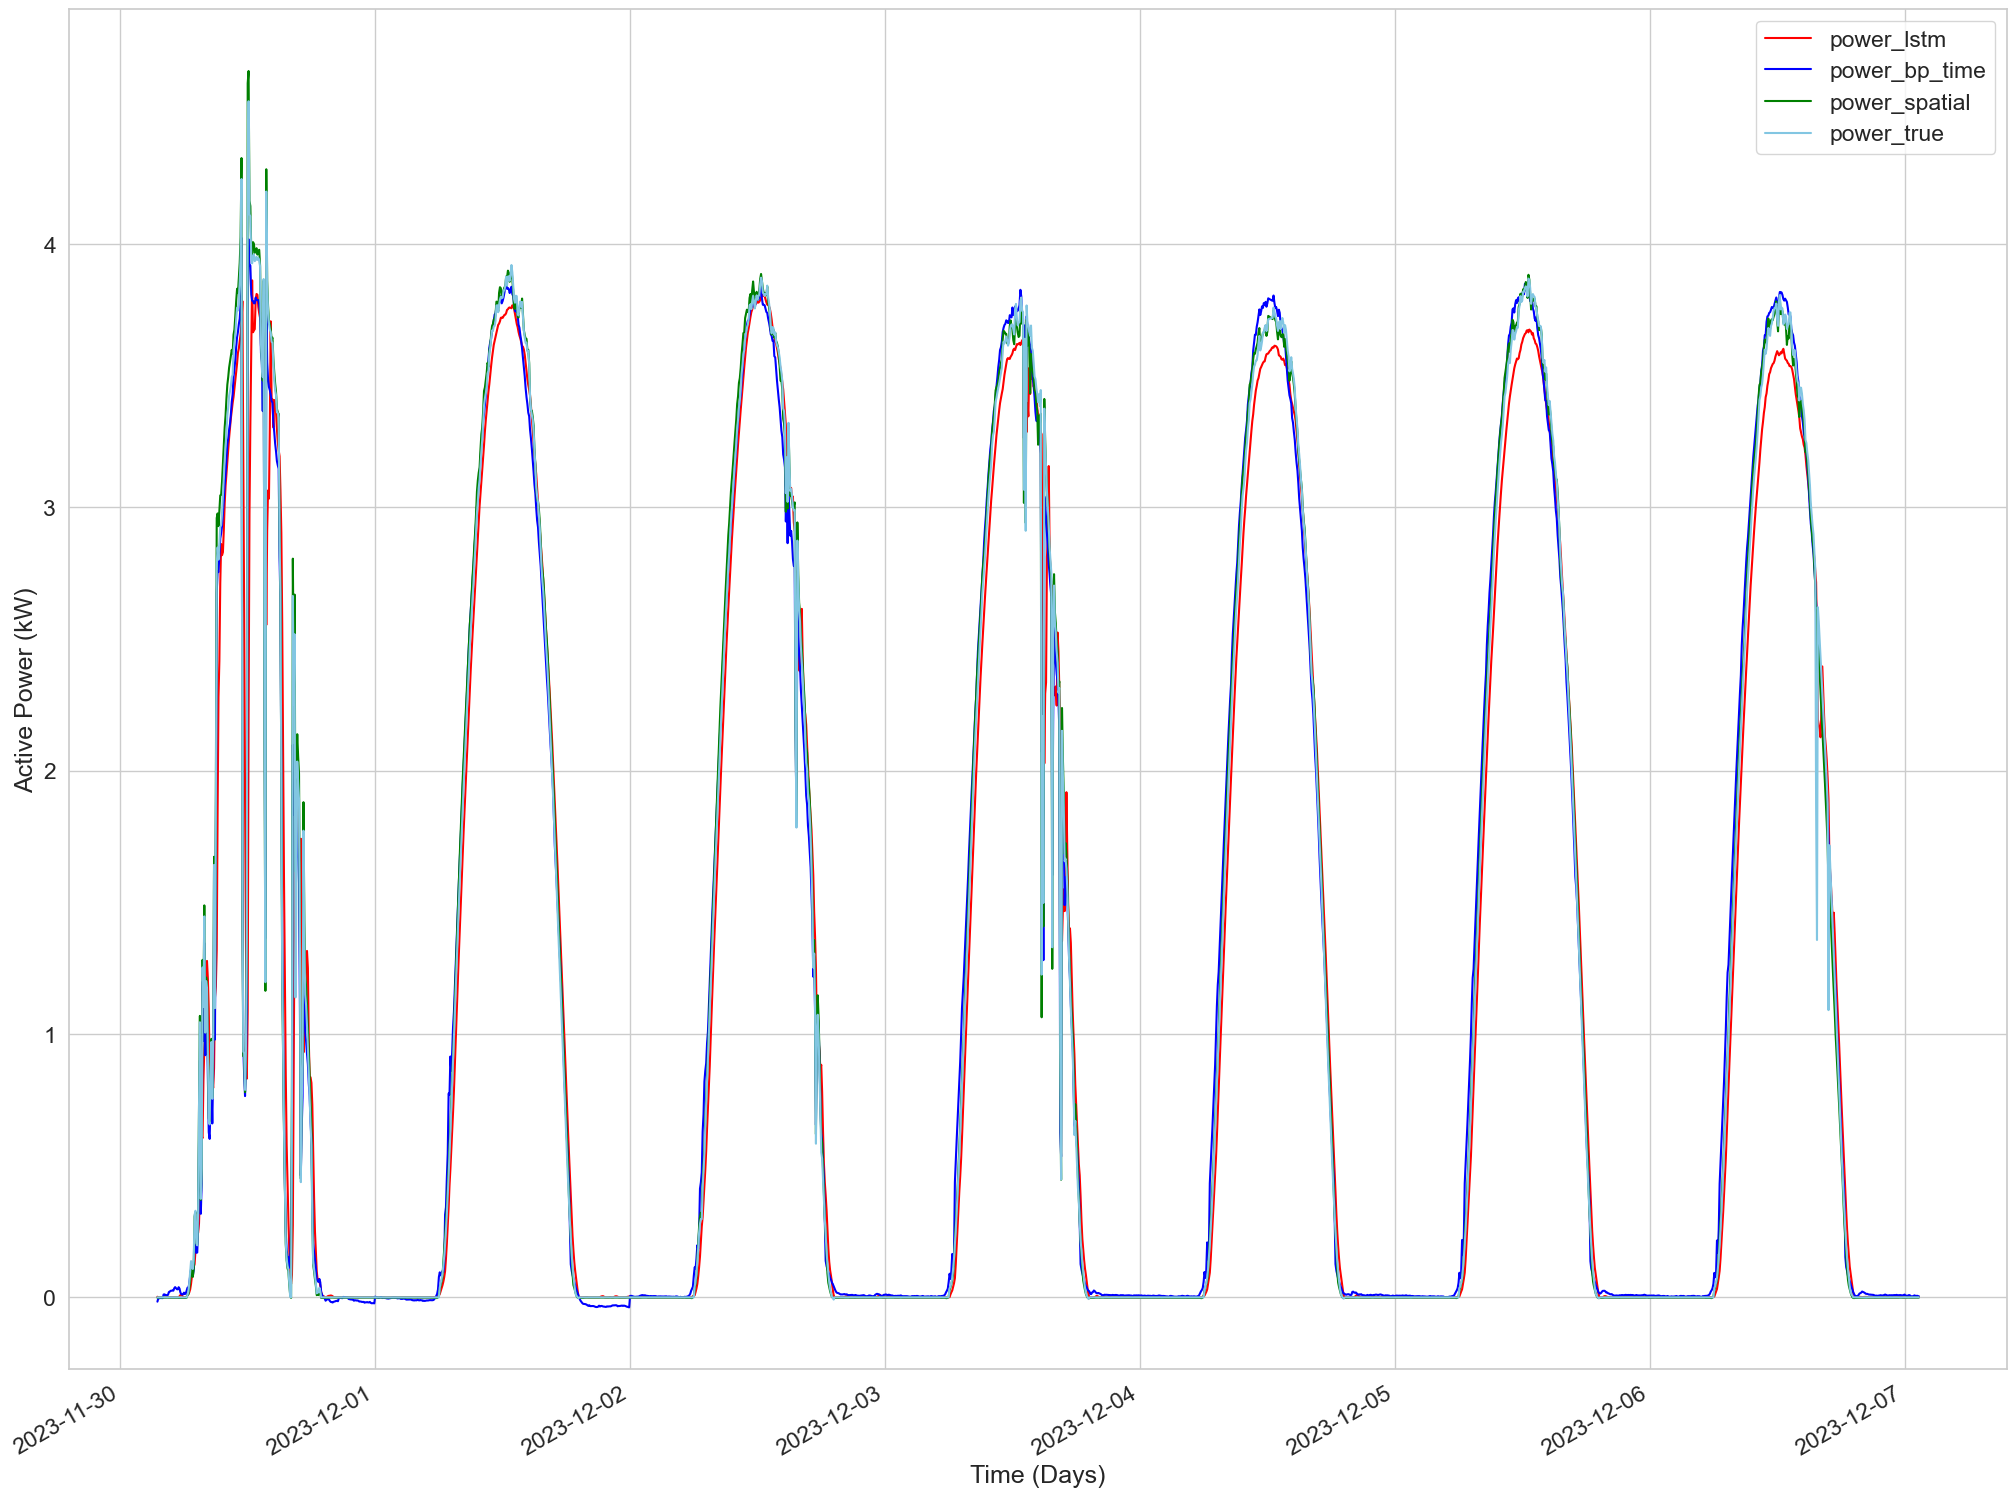

In [322]:
time_data = pd.to_datetime(data['timestamp'])
sns.set_theme(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 25, 20
fig = plt.figure(dpi=100)
plt.plot(time_data, data['power_lstm'], c='red', label='power_lstm')
plt.plot(time_data, data['power_bp_time'], c='blue', label='power_bp_time')
plt.plot(time_data, data['power_bp_spatial'], c='green', label='power_spatial')
plt.plot(time_data, data['power'], c='c', label='power_true')
plt.xlabel('Time (Days)')
plt.ylabel('Active Power (kW)')
plt.legend()

# 设置x轴标签格式
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=1))  # 每5天显示一个标签

# 自动旋转日期标签
fig.autofmt_xdate()

plt.show()

In [323]:
X=data[['power_lstm','power_bp_time','power_bp_spatial']].values
y=data['power'].values

In [324]:
X

array([[ 0.00218507, -0.01633399, -0.0010898 ],
       [ 0.        , -0.00343435, -0.0010898 ],
       [ 0.        , -0.00349849, -0.00109517],
       ...,
       [ 0.        ,  0.00625855, -0.0010898 ],
       [ 0.00037483,  0.00391395, -0.0010898 ],
       [ 0.00124528,  0.0044275 , -0.00120913]])

In [325]:
y

array([0., 0., 0., ..., 0., 0., 0.])

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [327]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [328]:
model.coef_

array([0.06902689, 0.00581467, 0.92237922])

In [329]:
model.intercept_

np.float64(-0.005569535046688223)

In [330]:
y_pred = model.predict(X_test)

In [331]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R^2:', r2)

MSE: 0.002545620378679987
R^2: 0.9988472399530586


C:\Users\Sirius\AppData\Local\Temp\ipykernel_26664\2822310905.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


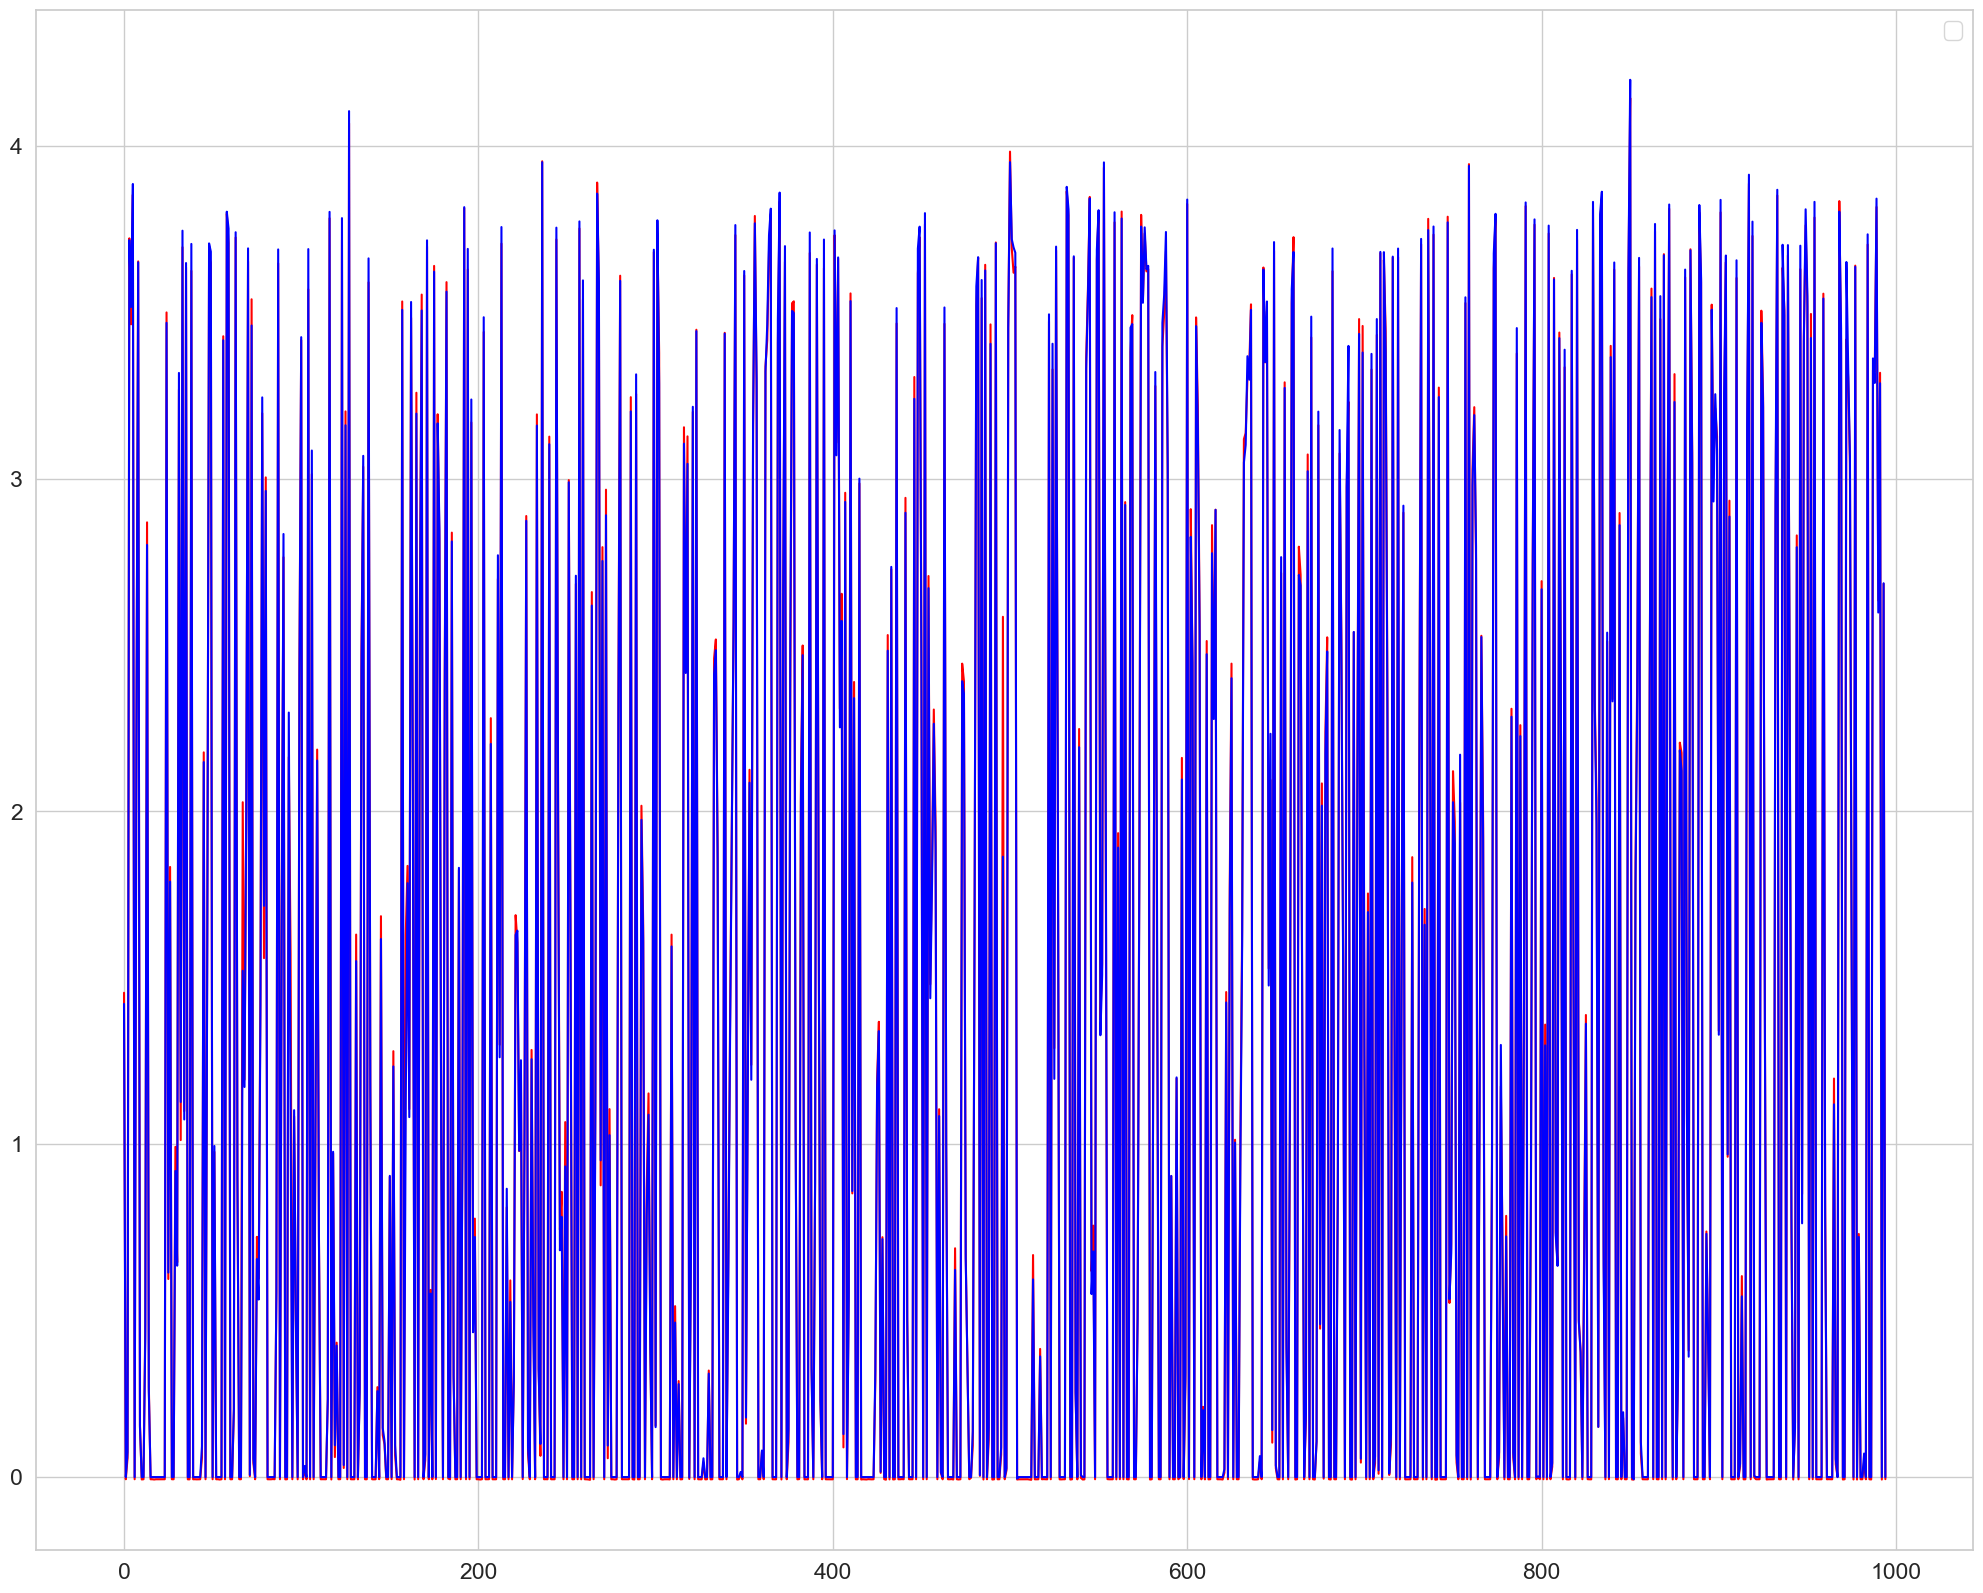

In [332]:
sns.set_theme(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 25, 20
fig = plt.figure(dpi=100)
plt.plot(y_pred, c='red')
plt.plot(y_test, c='blue')
plt.legend()
plt.show()

In [333]:
Y=model.predict(X)

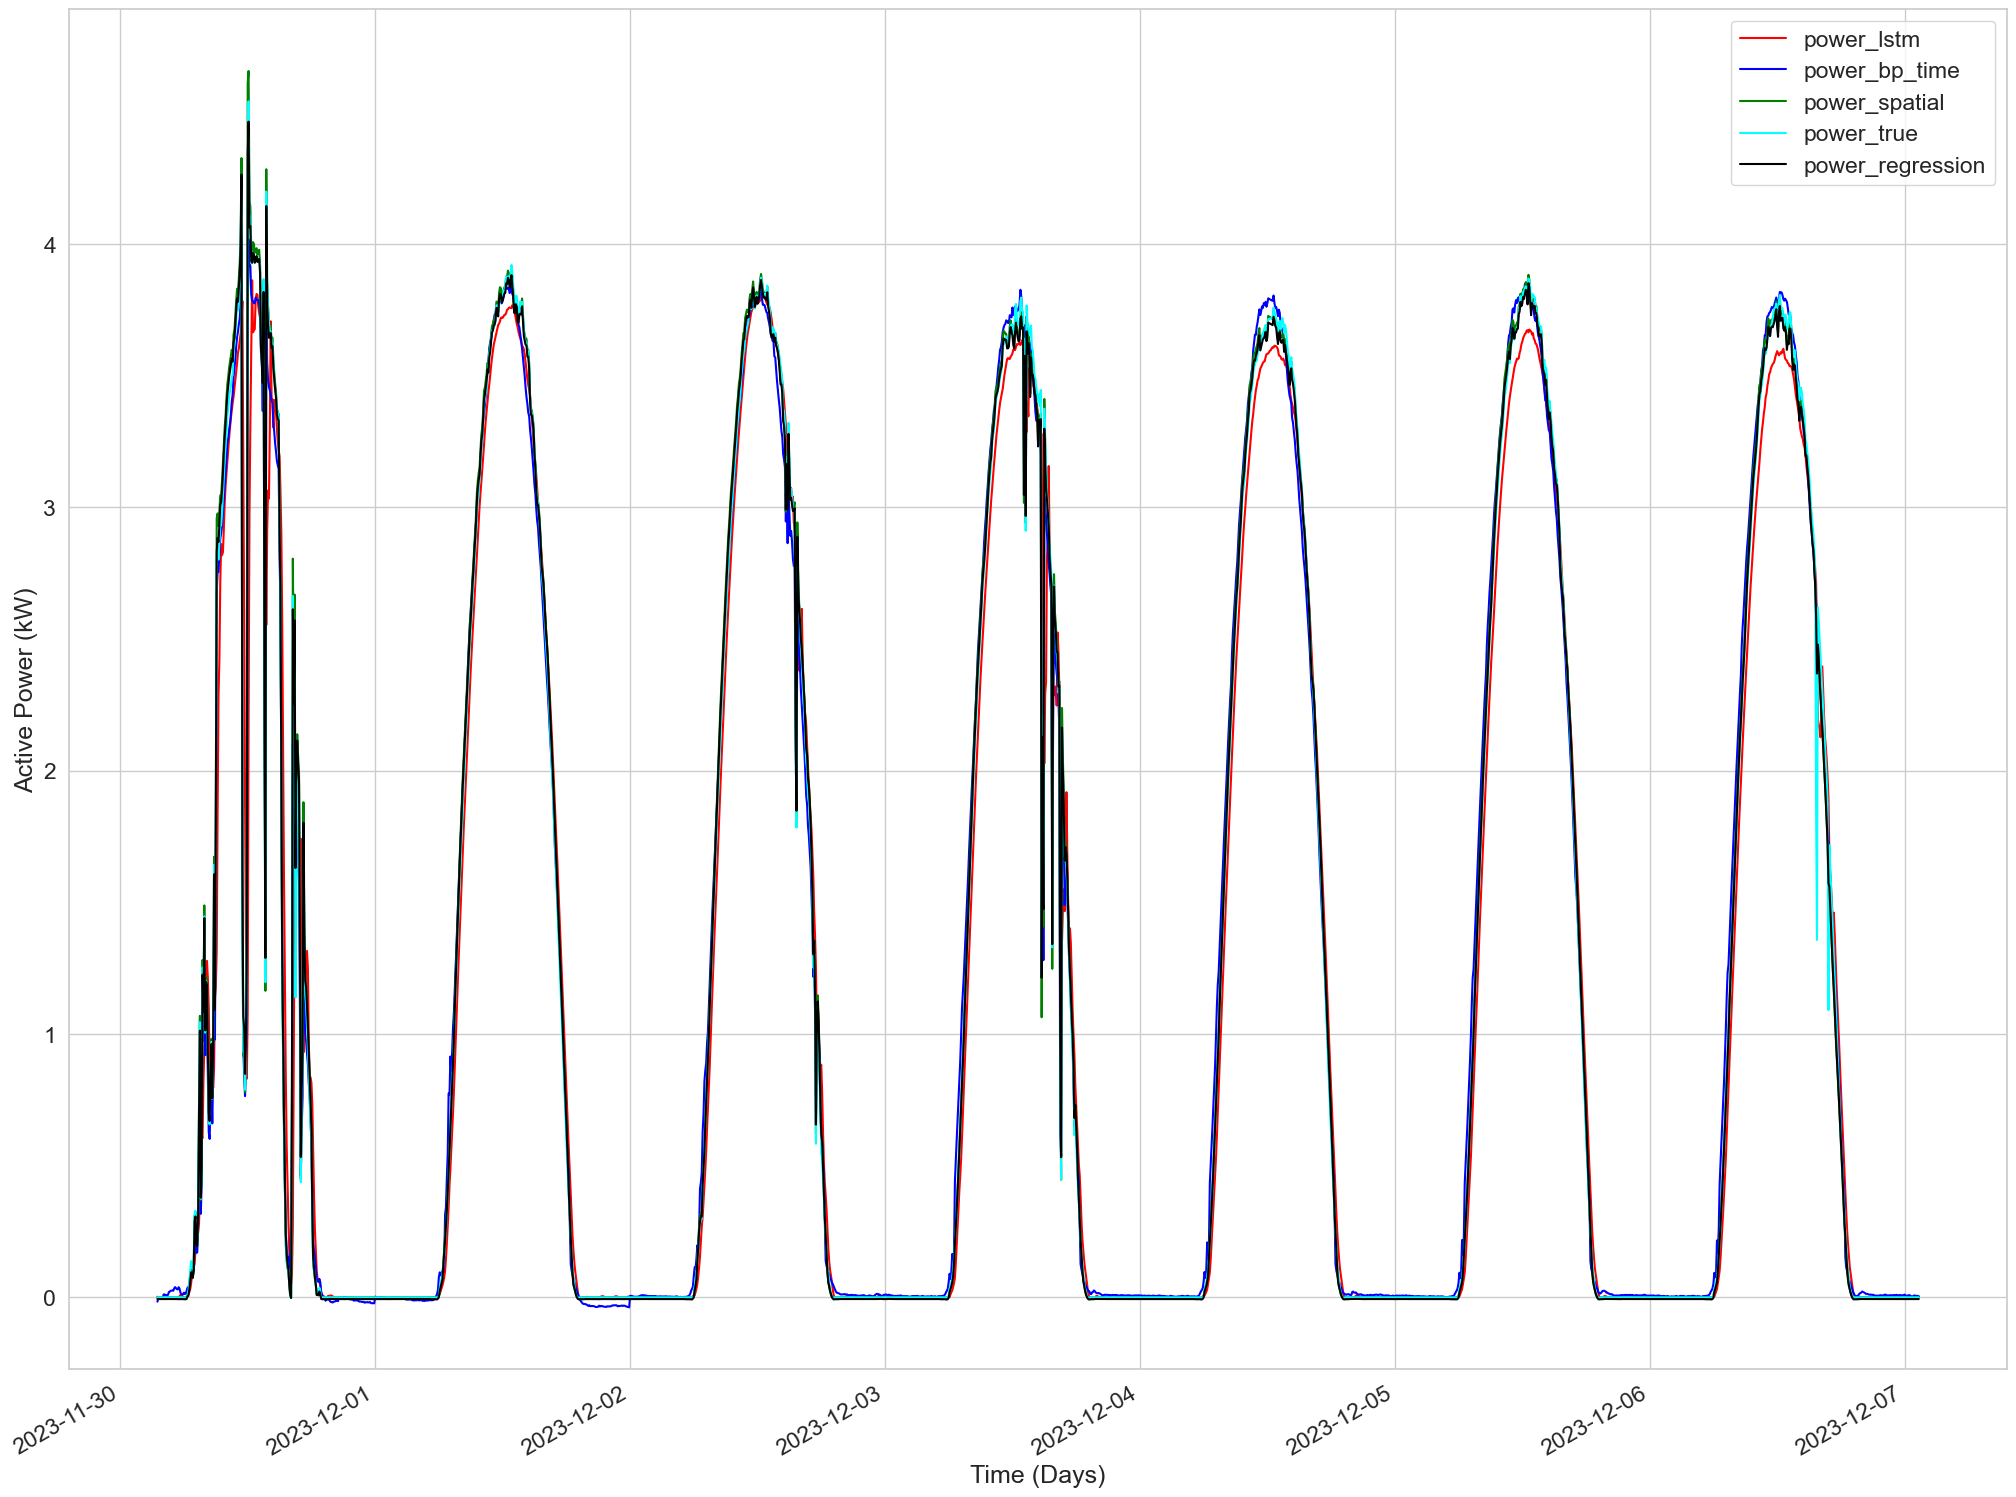

In [334]:
time_data = pd.to_datetime(data['timestamp'])
sns.set_theme(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 25, 20
fig = plt.figure(dpi=100)
plt.plot(time_data, data['power_lstm'], c='red', label='power_lstm')
plt.plot(time_data, data['power_bp_time'], c='blue', label='power_bp_time')
plt.plot(time_data, data['power_bp_spatial'], c='green', label='power_spatial')
plt.plot(time_data, data['power'], c='cyan', label='power_true')
plt.plot(time_data, Y, c='black', label='power_regression')
plt.xlabel('Time (Days)')
plt.ylabel('Active Power (kW)')
plt.legend()

# 设置x轴标签格式
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=1))  # 每5天显示一个标签

# 自动旋转日期标签
fig.autofmt_xdate()

plt.show()

In [335]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y,data['power'])

np.float64(0.0023514245141860986)

In [336]:
from sklearn.metrics import r2_score

In [337]:
r2_score(data['power_bp_time'][-1000:], data['power'][-1000:])

0.9944128604383189

In [338]:
mean_squared_error(data['power_bp_time'][-1000:], data['power'][-1000:])

np.float64(0.012066856528046224)

In [339]:
r2_score(data['power_bp_spatial'][-1000:], data['power'][-1000:])

0.9984841664129304

In [340]:
mean_squared_error(data['power_bp_spatial'][-1000:], data['power'][-1000:])

np.float64(0.0032967852331001737)

In [341]:
r2_score(data['power_lstm'][-1000:], data['power'][-1000:])

0.985167139397715

In [342]:
mean_squared_error(data['power_lstm'][-1000:], data['power'][-1000:])

np.float64(0.029731270958069315)

In [343]:
r2_score(Y[-1000:], data['power'][-1000:])

0.9985854190101555

In [344]:
mean_squared_error(Y[-1000:], data['power'][-1000:])

np.float64(0.0030398874291295602)

In [345]:
power_regression=Y.tolist()
power=data['power'].tolist()
power_bp_spatial=data['power_bp_spatial'].tolist()
power_bp_time=data['power_bp_time'].tolist()
power_lstm=data['power_lstm'].tolist()
timestamp=data['timestamp'].tolist()

In [346]:
import pyecharts.options as opts
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB
from pyecharts.charts import Line

x_data = timestamp
y_data = [0,1,2,3,4,5,6]


chart=(
    Line(init_opts=opts.InitOpts("1800px","900px"))
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="power_regression",
        y_axis=power_regression,
        label_opts=opts.LabelOpts(is_show=False),
        linestyle_opts=opts.LineStyleOpts(color="red", type_="dashed"),
    )
    .add_yaxis(
        series_name="power",
        y_axis=power,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name="power_bp_spatial",
        y_axis=power_bp_spatial,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name="power_bp_time",
        y_axis=power_bp_time,
        label_opts=opts.LabelOpts(is_show=False),
        linestyle_opts=opts.LineStyleOpts(color="purple"),
    )
    .add_yaxis(
        series_name="power_lstm",
        y_axis=power_lstm,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Power Forecast"),
        tooltip_opts=opts.TooltipOpts(trigger="axis"),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
        xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False),
    )
)
chart.load_javascript()

In [347]:
chart.render_notebook() 

In [348]:
chart.render("Power_Forecast.html")

'c:\\Users\\Sirius\\Desktop\\UM\\Semester1\\DS\\DS PROJECT\\course_project\\Power Forecast Based on Time and Spactiel Data\\Power_Forecast.html'

In [349]:
power_regression=Y[0:1000].tolist()
power=data['power'][0:1000].tolist()
power_bp_spatial=data['power_bp_spatial'][0:1000].tolist()
power_bp_time=data['power_bp_time'][0:1000].tolist()
power_lstm=data['power_lstm'][0:1000].tolist()
timestamp=data['timestamp'][0:1000].tolist()

x_data = timestamp
y_data = [0,1,2,3,4,5,6]


chart=(
    Line(init_opts=opts.InitOpts("1800px","900px"))
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="power_regression",
        y_axis=power_regression,
        label_opts=opts.LabelOpts(is_show=False),
        linestyle_opts=opts.LineStyleOpts(color="red", type_="dashed"),
    )
    .add_yaxis(
        series_name="power",
        y_axis=power,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name="power_bp_spatial",
        y_axis=power_bp_spatial,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name="power_bp_time",
        y_axis=power_bp_time,
        label_opts=opts.LabelOpts(is_show=False),
        linestyle_opts=opts.LineStyleOpts(color="purple"),
    )
    .add_yaxis(
        series_name="power_lstm",
        y_axis=power_lstm,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Power Forecast"),
        tooltip_opts=opts.TooltipOpts(trigger="axis"),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
        xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False),
    )
)

In [350]:
chart.render("Power_Forecast_1000_columns.html")

'c:\\Users\\Sirius\\Desktop\\UM\\Semester1\\DS\\DS PROJECT\\course_project\\Power Forecast Based on Time and Spactiel Data\\Power_Forecast_1000_columns.html'